In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing our cleaned data
#Changed to a relative directory so anyone can run it
df = pd.read_csv("../raw_data_read_only/clean_data2.csv")

In [3]:
print(df.columns) #Investigating which columns remain after cleaning 

Index(['channelDescription', 'channelJoinedDate', 'channelLocation',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount'],
      dtype='object')


In [4]:
df.info()

df["text"].sample(10)
#THIS IS THE "DESCRIPTION" OF THE VIDEO. MANY USERS LEAVE THE DESCRIPTION BLANK!!! 

#We want this. 
#I am changing the NaN entries to empty strings. 
# This is an easier and more performant way of doing this
# Also doing this for channelDescription
df["text"] = df["text"].fillna("")
df["channelDescription"] = df["channelDescription"].fillna("")

df["text"].sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   18151 non-null  object 
 1   channelJoinedDate    19185 non-null  object 
 2   channelLocation      13922 non-null  object 
 3   channelTotalVideos   19185 non-null  float64
 4   channelTotalViews    19185 non-null  float64
 5   channelUsername      19185 non-null  object 
 6   commentsCount        19163 non-null  float64
 7   date                 19184 non-null  object 
 8   duration             18818 non-null  object 
 9   id                   19185 non-null  object 
 10  isChannelVerified    19185 non-null  bool   
 11  likes                19167 non-null  float64
 12  numberOfSubscribers  19185 non-null  float64
 13  order                19185 non-null  float64
 14  text                 5657 non-null   object 
 15  title                19185 non-null 

347                                                       
1998     Berry lip combo using Flower Beauty Perfect Po...
2960                                                      
10115    #snailmucin #facemask #skincarevideo #peachsli...
3727     #AD I got to see my home country win a bronze ...
2610     TikTok: www.tiktok.com/@nats_tutorials\nIG: in...
1944         Check out the new Profusion Twilight Palette!
3439                                                      
9564                                                      
8741     ♡ ¨̮ #estheticiantips to my estheticians on th...
Name: text, dtype: object

In [5]:
#Double-checking for non-null entries
#Let's drop Channel Location since that one is also often empty

# There's no real point in incrementing the name of the dataframe here

df = df.drop("channelLocation", axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   19185 non-null  object 
 1   channelJoinedDate    19185 non-null  object 
 2   channelTotalVideos   19185 non-null  float64
 3   channelTotalViews    19185 non-null  float64
 4   channelUsername      19185 non-null  object 
 5   commentsCount        19163 non-null  float64
 6   date                 19184 non-null  object 
 7   duration             18818 non-null  object 
 8   id                   19185 non-null  object 
 9   isChannelVerified    19185 non-null  bool   
 10  likes                19167 non-null  float64
 11  numberOfSubscribers  19185 non-null  float64
 12  order                19185 non-null  float64
 13  text                 19185 non-null  object 
 14  title                19185 non-null  object 
 15  url                  19185 non-null 

In [6]:
#Okay, now I see that some columns still have empty entries. Let's drop them. 

df = df.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18798 entries, 0 to 19184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   18798 non-null  object 
 1   channelJoinedDate    18798 non-null  object 
 2   channelTotalVideos   18798 non-null  float64
 3   channelTotalViews    18798 non-null  float64
 4   channelUsername      18798 non-null  object 
 5   commentsCount        18798 non-null  float64
 6   date                 18798 non-null  object 
 7   duration             18798 non-null  object 
 8   id                   18798 non-null  object 
 9   isChannelVerified    18798 non-null  bool   
 10  likes                18798 non-null  float64
 11  numberOfSubscribers  18798 non-null  float64
 12  order                18798 non-null  float64
 13  text                 18798 non-null  object 
 14  title                18798 non-null  object 
 15  url                  18798 non-null  obje

In [7]:
#We are interested in engagement metrics. Obviously the more subscribers you have, the more views/likes/comments you will get. A post is performing well
#regardless of follower count if it has good "engagement", which is a metrics such as likes/subscriber. Here I am transforming raw likes/comments/views
#to engagement metrics. 

# Make sure to use underscores in column names. Spaces interfere with some functions such as pd.query()

df["likes_per_subscriber"] = df["likes"]/df["numberOfSubscribers"]
df["comments_per_subscriber"] = df["commentsCount"]/df["numberOfSubscribers"]
df["views_per_subscriber"] = df["viewCount"]/df["numberOfSubscribers"]

In [8]:
#Changing duration column from a string to an integer 
import datetime 

def convert_duration_to_int(item):
    item_as_datetime = datetime.datetime.strptime( item , "%H:%M:%S"  ) #converts string to a datetime object
    seconds = item_as_datetime.second + 60 * item_as_datetime.minute + 3600 * item_as_datetime.hour
    return seconds
    
df["duration_in_seconds"] = df["duration"].apply(convert_duration_to_int) 
df[["duration", "duration_in_seconds"]].sample(10) #Can confirm that column is correct now 

,duration,duration_in_seconds
12977,00:00:57,57
10195,00:00:14,14
12506,00:00:54,54
16223,00:00:06,6
14668,00:00:06,6
11607,00:02:59,179
12133,00:01:00,60
16902,00:00:14,14
12854,00:00:52,52
16028,00:00:59,59


<Axes: xlabel='duration_in_seconds', ylabel='likes_per_subscriber'>

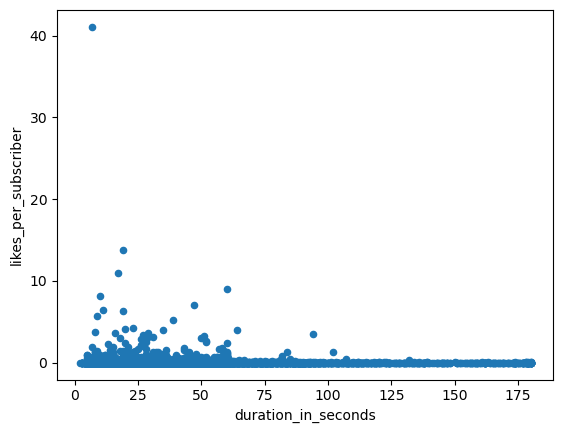

In [9]:
df.plot.scatter("duration_in_seconds", "likes_per_subscriber")

#This plot does nothing other than to let us know to change our scale. Also I am pretty sure that the "outliers" are a couple videos that went super viral

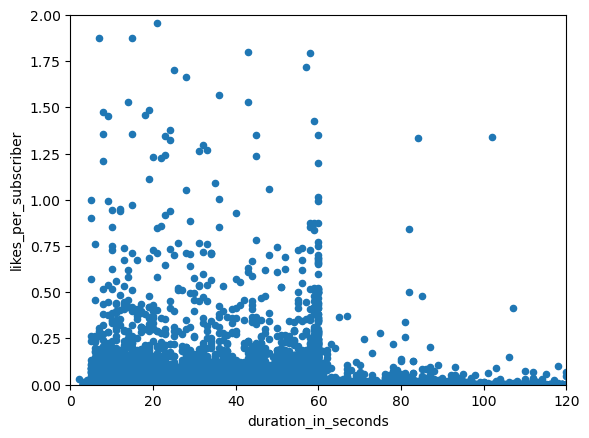

In [10]:
ax = df.plot.scatter("duration_in_seconds", "likes_per_subscriber")
ax.set_ylim(0, 2)
ax.set_xlim(0, 120)


plt.show()

#It looks like shorter videos do well, BUT we must remember: Video lengths of longer than 60 seconds were only introduced on October 15 of 2024.
#So the second half of the graph, videos that take longer than 60 seconds, is improperly populated. 
#So we want to look only at those videos posted before October 15, or after October 15, but not both 

In [11]:
#Okay, let's restrict our attention to those rows that came after October 15th.
#At the same time, we should change our data so that none of the data comes after 3/1. This is the date we first started collecting
#and after that date, data was scraped over the first few days. 

#Okay, time to continue to clean by removing data after 3/1
#First, we need to change the date column so that it is a datetime object and not a string

df["datetime"] = df["date"].apply(datetime.datetime.fromisoformat)
df["datetime_date"] = df["datetime"].dt.date.astype(str)
df["datetime_date"]

0        2025-01-01
1        2024-09-26
2        2024-12-13
3        2025-02-16
4        2024-07-07
            ...    
19179    2024-02-04
19181    2024-02-07
19182    2024-01-19
19183    2024-01-12
19184    2024-01-24
Name: datetime_date, Length: 18798, dtype: object

In [12]:
march_1_2025_str = '2025-03-01T00:00:00.000Z'
march_1_2025 = datetime.datetime.fromisoformat(march_1_2025_str) #This is an "aware" datetime object in the same format as the others 

oct_15_2024_str = '2024-10-15T00:00:00.000Z'
oct_15_2024 = datetime.datetime.fromisoformat(oct_15_2024_str) #This is an "aware" datetime object in the same format as the others 

In [14]:
#Okay, now we look at the data before 3/1

df = df.reset_index(drop=True) #Resetting the indexing of the rows to default 
df = df.query("datetime_date < '2025-03-01'")

df.to_csv("cleaner_transformed_data_Rachael_with_no_spaces_in_column_names.csv")

#Okay, now we split the data

df_before = df.query("datetime_date < '2024-10-15'")
df_after = df.query("datetime_date > '2024-10-15'") 

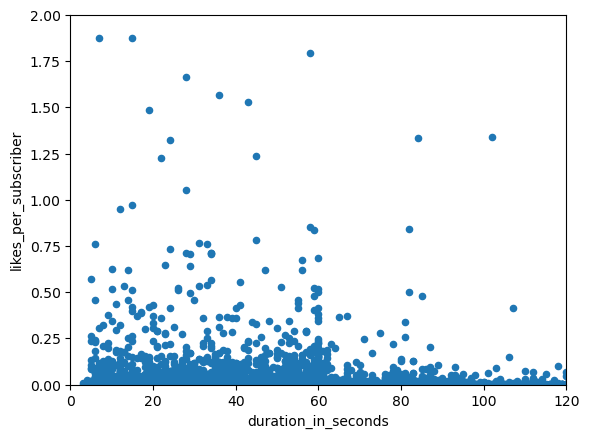

In [131]:
#Let's redo the scatter plot

ax = df_after.plot.scatter("duration_in_seconds", "likes_per_subscriber")

ax.set_xlim(0,120)
ax.set_ylim(0,2)

plt.show()

#I definitely see that videos that are longer in length seemm to be less viral. I also see a drop-off after 60 seconds, just like before, except now
#we can CONFIRM that this drop-off is not due to the under-population of data UNLESS most people simply still choose to create videos that are less than 
#60 seconds long

#What we need to compare is the MEAN of videos under 60 seconds to the MEAN of videos over 60 seconds 

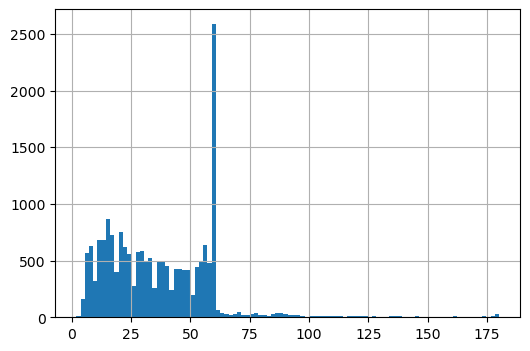

In [133]:
#First let's confirm distribution is heavily skewed toward under 60 seconds even after
#looking only at data that comes after october 15

plt.figure(figsize = (6,4)) 

df["duration_in_seconds"].hist(bins=100)

plt.show()

#As we can see, most videos are under 60 seconds, with a HUGE number of them being almost exactly 60 seconds

In [74]:
#Creating an indicator variable so that we can see two violin plots based on length

df_after = df_after.copy() #Makes this its own thing instead of a view object from our previous dataframe

df_after["duration_ind"] = np.where(df_after.eval("duration_in_seconds < 60"), 0, 1) # 0 means less  60 seconds, 1 means greater than or equal to 60

df_after["duration_ind"]

0        1
2        1
3        1
5        0
9        0
        ..
19074    1
19075    0
19076    0
19077    0
19078    0
Name: duration_ind, Length: 6271, dtype: int64

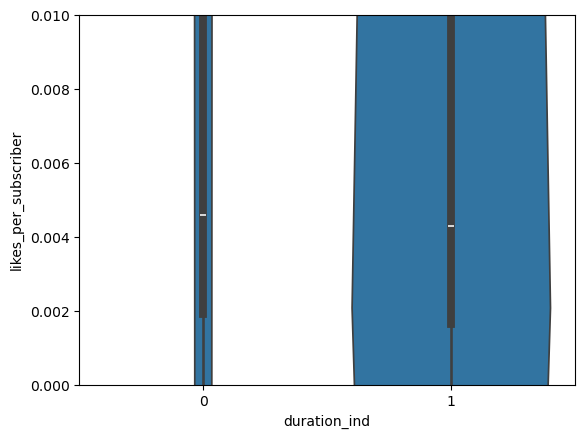

In [75]:
sns.violinplot( data = df_after, y = "likes_per_subscriber", x = "duration_ind")
plt.ylim(0,.01)
plt.show()

#This is an exceptionally shitty graph but you can see that the mean of the "short" videos is slightly higher. 

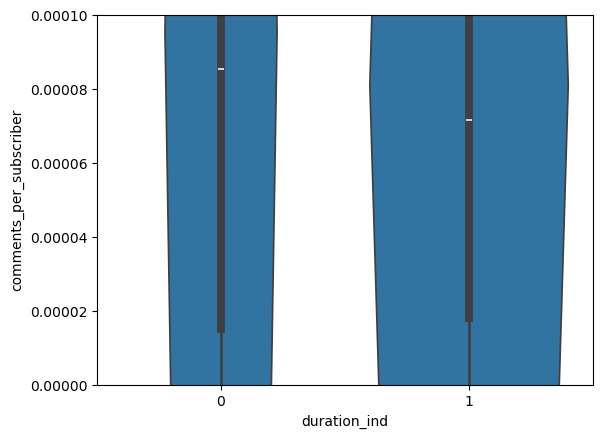

In [76]:
sns.violinplot( data = df_after, y = "comments_per_subscriber", x = "duration_ind")
plt.ylim(0,.0001)
plt.show()

#This is an exceptionally shitty graph but you can see that the mean of the "short" videos is again slightly higher. 

#These graphs are so bad that we should just do t-test with these two groups and their means instead. 
#But we have some preliminary analysis that suggests shorter videos do better. 

In [77]:
#Often, influencers are encouraged to include hashtags to reach their audience. 
#However, some people say that hashtags are viewed as "spammy". 
#We will create an indicator variable that tests whether a hashtag appears in a video's title.
#Note that there is no such thing as a description separate from the title in our current dataframe

df = df.copy()

df["hashtag_indicator"] = df["title"].str.count("#")

df_yes = df.query("hashtag_indicator > 0")
df_no = df.query("hashtag_indicator == 0")

print(df_yes["views_per_subscriber"].mean())
print(df_no["views_per_subscriber"].mean())
print(df["views_per_subscriber"].mean())

#As you can see, including hashtags in the title significantly improves views! We should do a t-test here, and compare to 
#hashtags in title alone vs hashtags in both title and description vs hashtags in description alone 

1.182695058064597
0.5320534259637928
0.8695577644367655


In [137]:
print(df_yes["viewCount"].mean())
print(df_no["viewCount"].mean())
#But it also seems like people who already get lots of views don't bother with hastags. 

238323.9238026869
480488.5531115287


In [139]:
#Another question: Among people who use already hashtags, are general hashtags better or specific hashtags? 
#The two most general hashtags for our niche are #makeup and #skincare. 

#Let's create another indicator variable and look at the means

df_yes = df_yes.copy()

df_yes["generic_hashtag_indicator"] = df_yes["title"].str.count("#makeup") + df_yes["title"].str.count("#skincare")

df_yesg = df_yes.query("generic_hashtag_indicator > 0")
df_nog = df_yes.query("generic_hashtag_indicator == 0")

print(df_yesg["views_per_subscriber"].mean())
print(df_nog["views_per_subscriber"].mean())
print(df_yes["views_per_subscriber"].mean())

df_yesg.shape
#Okay, we see that generic hashtags put you below the mean and that not including generic hashtags put you above the mean 
#So maybe that means only using specific hashtags are better. 
#More analysis can be done here
#Also please notice that plenty of people do use generic hashtags!! 

1.0661660392490577
1.284135435464351
1.182695058064597


(4538, 25)

In [141]:
#Does including hashtags also increase likes?

print(df_yes["likes_per_subscriber"].mean())
print(df_no["likes_per_subscriber"].mean())
print(df["likes_per_subscriber"].mean())

#Yes they do 

0.04873399464923632
0.02437011937731831
0.037008280233604744


In [81]:
df3.columns

Index(['channelDescription', 'channelJoinedDate', 'channelTotalVideos',
       'channelTotalViews', 'channelUsername', 'commentsCount', 'date',
       'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers',
       'order', 'text', 'title', 'url', 'viewCount', 'likes per subscriber',
       'comments per subscriber', 'views per subscriber',
       'duration in seconds', 'datetime date', 'hashtag indicator'],
      dtype='object')

In [82]:
#Checking if the influencer includes a "call to action" that specifically asks users to comment

df["comment_call_indicator"] = df["title"].str.count("comment")

df_yesc = df.query("comment_call_indicator > 0")
df_noc = df.query("comment_call_indicator == 0")

print("If you ask for comments, your mean comment engagement is: \n", df_yesc["comments_per_subscriber"].mean())
print("If you do not ask for comments, your mean comment engagement is: \n", df_noc["comments_per_subscriber"].mean())
print("Overall mean comment engagement is: \n", df["comments_per_subscriber"].mean())

print("If you ask for comments, your mean view engagement is: \n", df_yesc["views_per_subscriber"].mean())
print("If you do not ask for comments, your mean view engagement is: \n", df_noc["views_per_subscriber"].mean())
print("Overall mean view engagement is: \n", df["views_per_subscriber"].mean())

print(df_yesc["likes_per_subscriber"].mean())
print(df_noc["likes_per_subscriber"].mean())
print(df["likes_per_subscriber"].mean())

df_yesc.shape
#So asking for comments does appear to significantly improve the number of comments 
#But not the number of views or the number of likes
#And very few people ask for comments, so it's unclear if this analysis was worthwhile. 

If you ask for comments, your mean comment engagement is: 
 0.001099426118257928
If you do not ask for comments, your mean comment engagement is: 
 0.0004661173209173275
Overall mean comment engagement is: 
 0.0004678355222506805
If you ask for comments, your mean view engagement is: 
 0.7108267874429472
If you do not ask for comments, your mean view engagement is: 
 0.8699895817849643
Overall mean view engagement is: 
 0.8695577644367655
0.03572682042682564
0.03701176636205974
0.037008280233604744


(51, 25)

In [83]:
#Checking if engagement is higher if a popular brand like Natasha Denona is mentioned 
    
df["ND_ind"] = df["title"].str.count("natasha denona")

df_yesnd = df.query("ND_ind > 0")
df_nond = df.query("ND_ind == 0")

print(df_yesnd["likes_per_subscriber"].mean())
print(df_nond["likes_per_subscriber"].mean())
print(df["likes_per_subscriber"].mean())

df_yesnd.shape

#This analysis sucked since so few people mention Natasha Denona. 

0.0033718735614546567
0.03701901982705052
0.037008280233604744


(6, 26)

In [73]:
#Checking if engagement is higher if a popular brand like drunk elephant is mentioned 
    
df["DE_ind"] = df["title"].str.count("drunk elephant")

df_yesde = df.query("DE_ind > 0")
df_node = df.query("DE_ind == 0")

print(df_yesde["likes_per_subscriber"].mean())
print(df_node["likes_per_subscriber"].mean())
print(df["likes_per_subscriber"].mean())

df_yesde.shape

#This analysis sucked since so few people mention drunk elephant

0.0036612467128412166
0.037020702629147584
0.037008280233604744


(16, 25)

In [153]:
#Checking if posts that have a description do better on average

df_nodesc = df.loc[ df["text"] == '']
df_yesdesc = df.loc[ df["text"] != '' ]

print(df_yesdesc["views_per_subscriber"].mean())
print(df_nodesc["views_per_subscriber"].mean())
print(df["views_per_subscriber"].mean())

df_yesdesc.shape

#This is super weird- why does including a description make your video perform so much worse? 

0.6293039875143882
0.9701303778688405
0.8695577644367655


(4735, 23)

In [147]:
#Checking if posts that have a hashtag in the description do better on average 
    
df["ht_desc_ind"] = df["text"].str.count("#") 

df_yeshtd = df.query("ht_desc_ind > 0")
df_nohtd = df.query("ht_desc_ind == 0")

print(df_yeshtd["views_per_subscriber"].mean())
print(df_nohtd["views_per_subscriber"].mean())
print(df["views_per_subscriber"].mean())

#As you can see, including hashtags in the title significantly improves views! We should do a t-test here, and compare to 
#hashtags in title alone vs hashtags in both title and description vs hashtags in description alone 

#As before, having a hashtag in the description lowers the viewcount. This is probably because having a description at all lowers the viewcount. Weird!!
#However, .68 is a little higher than the overall mean .66 of videos that have a description, as expected. 

0.6791112209978151
0.910079874131066
0.8695577644367655


In [37]:
# Convert date to a pandas datetime series so we can use .dt functions on it - Joanne
df['day_of_week'] = df['datetime'].dt.day_name()
df["day_of_week_num"] = df["datetime"].dt.day_of_week
df


,channelDescription,channelJoinedDate,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,isChannelVerified,...,duration_in_seconds,datetime,datetime_date,hashtag_indicator,comment_call_indicator,ND_ind,DE_ind,ht_desc_ind,day_of_week,day_of_week_num
0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,True,...,80,2025-01-01 17:03:25+00:00,2025-01-01,0,0,0,0,0,Wednesday,2
1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,True,...,59,2024-09-26 17:09:34+00:00,2024-09-26,0,0,0,0,0,Thursday,3
2,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1398.0,2024-12-13T17:06:39.000Z,00:01:06,iMhxKAQmHuc,True,...,66,2024-12-13 17:06:39+00:00,2024-12-13,0,0,0,0,0,Friday,4
3,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,529.0,2025-02-16T18:19:19.000Z,00:01:25,bM3XWjv8lfI,True,...,85,2025-02-16 18:19:19+00:00,2025-02-16,0,0,0,0,0,Sunday,6
4,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,4539.0,2024-07-07T17:33:45.000Z,00:01:00,L0mCS-xdzbc,True,...,60,2024-07-07 17:33:45+00:00,2024-07-07,0,0,0,0,0,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19179,"Hey friends!\n\nMy name is Alex, and on this c...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,1.0,2024-02-04T18:05:27.000Z,00:00:23,GcxanRv-x0o,False,...,23,2024-02-04 18:05:27+00:00,2024-02-04,0,0,0,0,5,Sunday,6
19181,"Hey friends!\n\nMy name is Alex, and on this c...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,2.0,2024-02-07T23:43:52.000Z,00:00:11,4vmNbyX5onQ,False,...,11,2024-02-07 23:43:52+00:00,2024-02-07,0,0,0,0,6,Wednesday,2
19182,"Hey friends!\n\nMy name is Alex, and on this c...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,0.0,2024-01-19T21:42:11.000Z,00:00:21,9K3k8tC3zwY,False,...,21,2024-01-19 21:42:11+00:00,2024-01-19,0,0,0,0,7,Friday,4
19183,"Hey friends!\n\nMy name is Alex, and on this c...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,0.0,2024-01-12T18:05:26.000Z,00:00:21,XQqwG1JIga8,False,...,21,2024-01-12 18:05:26+00:00,2024-01-12,0,0,0,0,5,Friday,4


<Axes: xlabel='likes', ylabel='viewCount'>

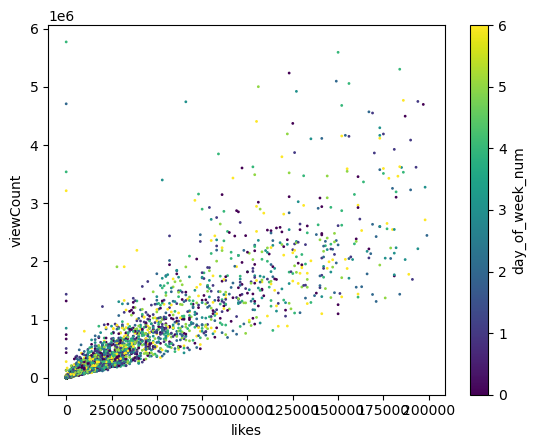

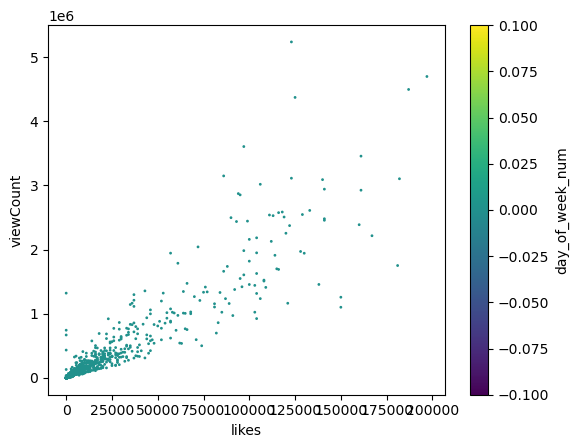

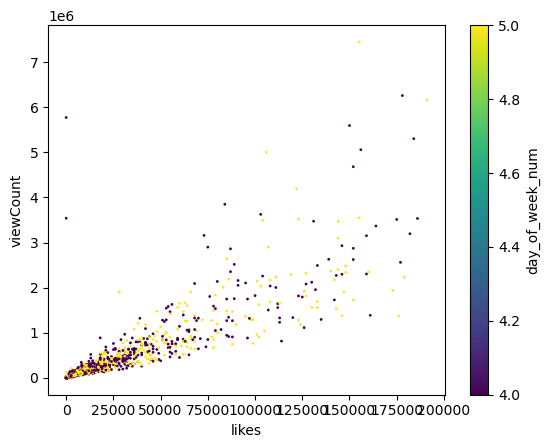

In [38]:
# plotting likes vs viewcount, where monday = 0 and sunday = 6, viewCount <6e7  and likes < 2e6 to remove like less than 10 super-super outliers


df.query("viewCount < 6e6 and likes < 2e5").plot.scatter( x="likes", y="viewCount", c="day_of_week_num", colormap="viridis", s=1)

# just monday
df.query("viewCount < 6e6 and likes < 2e5 and day_of_week_num == 0  ").plot.scatter( x="likes", y="viewCount", c="day_of_week_num", colormap="viridis", s=1)

#monday vs saturday

df.query("views_per_subscriber < 6e6 and likes < 2e5 and (day_of_week_num == 5 or day_of_week_num == 4)").plot.scatter( x="likes", y="viewCount", c="day_of_week_num", colormap="viridis", s=1)

#print(df_3[“views per subscriber”].mean())

In [39]:
#things to be weary of: a small channel with little/no following that has a viral video on a friday could be influencing this
#unsure if "views_per_subscriber" is the best metric then
df.groupby("day_of_week")["views_per_subscriber"].mean().sort_values(ascending=False)

day_of_week
Friday       1.401578
Tuesday      0.834486
Sunday       0.823692
Monday       0.813091
Wednesday    0.771958
Thursday     0.733502
Saturday     0.685339
Name: views_per_subscriber, dtype: float64

In [40]:
#what about just raw views?
df.groupby("day_of_week")["viewCount"].mean().sort_values(ascending=False)


day_of_week
Sunday       500595.830986
Saturday     384444.391251
Friday       371303.216745
Monday       350729.825436
Wednesday    309581.274691
Tuesday      303393.582744
Thursday     296797.732601
Name: viewCount, dtype: float64

In [41]:
#just as an aside, how many videos get posted on a specific day? 
#what if its already common knowledge that a specific day is best, and so theyre already following an optimized schedule
#it appears to be a weekend vs weekday 
#idea: influencers filming on the weekend because they have day jobs, editing to post on following weekday
#alt idea: people post low effort shorts daily as their "9-5", take the weekend off?
df["day_of_week"].value_counts()

day_of_week
Wednesday    2916
Monday       2870
Tuesday      2828
Friday       2759
Thursday     2730
Saturday     2423
Sunday       2272
Name: count, dtype: int64

In [42]:
#total number of views on a specifc day
df.groupby("day_of_week")["viewCount"].sum().sort_values(ascending=False)

day_of_week
Sunday       1.137354e+09
Friday       1.024426e+09
Monday       1.006595e+09
Saturday     9.315088e+08
Wednesday    9.027390e+08
Tuesday      8.579971e+08
Thursday     8.102578e+08
Name: viewCount, dtype: float64

In [43]:
#total number of views per subscriber on a specifc day
df.groupby("day_of_week")["views_per_subscriber"].sum().sort_values(ascending=False)

day_of_week
Friday       3866.952872
Tuesday      2359.926765
Monday       2333.571459
Wednesday    2251.030674
Thursday     2002.459405
Sunday       1871.428095
Saturday     1660.577586
Name: views_per_subscriber, dtype: float64

In [44]:
#all I have learnt is that thursday is just consistently a bad day. 
#propose new law: shut down youtube on thursday to save environment?
#so far, things are less likely to be uploaded/posted on a sunday - but a video is more likely to go viral on sunday
#i say "viral - implying generally popularity, not just popular among loyal fan base"
#because sunday is 2nd to last when views_per_subscriber to accounted for
#but is "first" when just views are accounted for


df.groupby("day_of_week")["likes"].sum().sort_values(ascending=False)

day_of_week
Friday       56241699.0
Monday       56002542.0
Sunday       55667352.0
Saturday     50542990.0
Wednesday    48893027.0
Thursday     46830147.0
Tuesday      46406145.0
Name: likes, dtype: float64

In [45]:

df.groupby("day_of_week")["likes"].mean().sort_values(ascending=False)

day_of_week
Sunday       24501.475352
Saturday     20859.673958
Friday       20384.812976
Monday       19513.080836
Thursday     17153.900000
Wednesday    16767.156036
Tuesday      16409.527935
Name: likes, dtype: float64

In [46]:
#more popular account only post on the weekend?
#what is wrong with thursday? didn't god made the birds and the fishies that day? /s
df.groupby("day_of_week")["numberOfSubscribers"].mean().sort_values(ascending=False)

day_of_week
Sunday       815497.425616
Saturday     783333.398267
Friday       754423.100036
Thursday     721018.027473
Monday       715581.142509
Wednesday    700951.548697
Tuesday      690524.194130
Name: numberOfSubscribers, dtype: float64

In [47]:
df.groupby("day_of_week")[["numberOfSubscribers", "likes", "viewCount", "views_per_subscriber"]].mean()

#Wednesday has the fewest likes, but ranks 5/7 in views per subscriber (6/7 just views) 
#The weekend you get most likes, with more views being contributed from non-subscribers - best day to expand your reach?
#Friday is the best weekday to get likes, some likely scenario is 80% of your subscribers are watching, and some 60% of your views are nonsubscribers
# ^ depending on if shorts counts rewatches from subscribers - is a "view" everytime a short is replayed? is there a time-out threshold 
#dont post TWTH?
#maybe if youre a small channel you do post TWTH - less competition and people will always yearn for the doomscroll mines. 

,numberOfSubscribers,likes,viewCount,views_per_subscriber
day_of_week,,,,
Friday,754423.100036,20384.812976,371303.216745,1.401578
Monday,715581.142509,19513.080836,350729.825436,0.813091
Saturday,783333.398267,20859.673958,384444.391251,0.685339
Sunday,815497.425616,24501.475352,500595.830986,0.823692
Thursday,721018.027473,17153.900000,296797.732601,0.733502
Tuesday,690524.194130,16409.527935,303393.582744,0.834486
Wednesday,700951.548697,16767.156036,309581.274691,0.771958
